In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


### Loading data


In [18]:
root_dir = os.path.abspath(os.curdir)  # Doesn't work as intended. Needs fix below.
root_dir = root_dir[:-9]
results_dir = root_dir + "/results/"
# file_name = "belief_distributions_before_after.csv"
# file_name = "belief_distr_{'NormalUser': 1.0, 'Disinformer': 0.0}.csv"    # tiny experiment to see whether roughly makes sense?
# file_name = "belief_distr_{'NormalUser': 0.99, 'Disinformer': 0.01}.csv"
file_name = "belief_distr_{'NormalUser': 0.98, 'Disinformer': 0.02}.csv"  # Actual experiment condition
# file_name = "belief_distr_{'NormalUser': 0.95, 'Disinformer': 0.05}.csv"

file_dir = results_dir + file_name

data = pd.read_csv(file_dir)


In [19]:
data.head(5)


,Unnamed: 0,Replication,"((0.0, <SelectAgentsBy.RANDOM: 0>), True)","((0.0, <SelectAgentsBy.RANDOM: 0>), False)","((0.1, <SelectAgentsBy.RANDOM: 0>), True)","((0.1, <SelectAgentsBy.RANDOM: 0>), False)","((0.25, <SelectAgentsBy.RANDOM: 0>), True)","((0.25, <SelectAgentsBy.RANDOM: 0>), False)"
0,0,0,"([66, 76, 41, 15, 1, 39, 57, 75, 30, 0, 13, 59...","([75, 79, 83, 39, 81, 43, 98, 66, 94, 65, 38, ...","([25, 54, 4, 31, 3, 57, 12, 80, 15, 50, 60, 0,...","([24, 50, 9, 39, 56, 23, 91, 58, 15, 18, 39, 6...","([71, 95, 21, 33, 85, 8, 22, 77, 53, 53, 67, 2...","([88, 1, 55, 26, 25, 90, 92, 20, 22, 91, 10, 3..."
1,1,1,"([35, 92, 79, 64, 67, 41, 74, 8, 28, 17, 8, 92...","([17, 51, 27, 1, 79, 48, 93, 44, 97, 87, 14, 3...","([76, 90, 44, 46, 53, 10, 64, 1, 3, 32, 22, 26...","([59, 19, 95, 23, 31, 29, 76, 90, 78, 31, 19, ...","([87, 42, 81, 8, 24, 79, 50, 14, 16, 36, 48, 9...","([40, 29, 71, 89, 84, 93, 49, 42, 86, 26, 19, ..."
2,2,2,"([35, 23, 90, 9, 29, 55, 91, 42, 50, 10, 84, 4...","([17, 68, 53, 93, 60, 84, 12, 4, 99, 26, 50, 9...","([79, 73, 72, 5, 25, 97, 87, 31, 24, 80, 99, 4...","([92, 28, 93, 50, 73, 52, 43, 89, 79, 73, 26, ...","([66, 93, 32, 42, 79, 32, 33, 85, 65, 11, 27, ...","([73, 67, 41, 91, 11, 10, 46, 4, 7, 44, 13, 20..."


### Reshaping data

In [20]:
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data.drop(["a", "Replication"], axis=1, inplace=True)
data.head(5)

,"((0.0, <SelectAgentsBy.RANDOM: 0>), True)","((0.0, <SelectAgentsBy.RANDOM: 0>), False)","((0.1, <SelectAgentsBy.RANDOM: 0>), True)","((0.1, <SelectAgentsBy.RANDOM: 0>), False)","((0.25, <SelectAgentsBy.RANDOM: 0>), True)","((0.25, <SelectAgentsBy.RANDOM: 0>), False)"
0,"([66, 76, 41, 15, 1, 39, 57, 75, 30, 0, 13, 59...","([75, 79, 83, 39, 81, 43, 98, 66, 94, 65, 38, ...","([25, 54, 4, 31, 3, 57, 12, 80, 15, 50, 60, 0,...","([24, 50, 9, 39, 56, 23, 91, 58, 15, 18, 39, 6...","([71, 95, 21, 33, 85, 8, 22, 77, 53, 53, 67, 2...","([88, 1, 55, 26, 25, 90, 92, 20, 22, 91, 10, 3..."
1,"([35, 92, 79, 64, 67, 41, 74, 8, 28, 17, 8, 92...","([17, 51, 27, 1, 79, 48, 93, 44, 97, 87, 14, 3...","([76, 90, 44, 46, 53, 10, 64, 1, 3, 32, 22, 26...","([59, 19, 95, 23, 31, 29, 76, 90, 78, 31, 19, ...","([87, 42, 81, 8, 24, 79, 50, 14, 16, 36, 48, 9...","([40, 29, 71, 89, 84, 93, 49, 42, 86, 26, 19, ..."
2,"([35, 23, 90, 9, 29, 55, 91, 42, 50, 10, 84, 4...","([17, 68, 53, 93, 60, 84, 12, 4, 99, 26, 50, 9...","([79, 73, 72, 5, 25, 97, 87, 31, 24, 80, 99, 4...","([92, 28, 93, 50, 73, 52, 43, 89, 79, 73, 26, ...","([66, 93, 32, 42, 79, 32, 33, 85, 65, 11, 27, ...","([73, 67, 41, 91, 11, 10, 46, 4, 7, 44, 13, 20..."


In [21]:
# Rename columns
# column_names = ["0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False",]
data.rename({"((0.0, <SelectAgentsBy.RANDOM: 0>), True)":"0%,\nR",
             "((0.0, <SelectAgentsBy.RANDOM: 0>), False)":"0%,\n–",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), True)":"10%,\nR",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), False)":"10%,\n–",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), True)":"25%,\nR",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), False)":"25%,\n–",
             "((0.9, <SelectAgentsBy.RANDOM: 0>), True)":"90%,\nR",
             "((0.9, <SelectAgentsBy.RANDOM: 0>), False)":"90%,\n–"}, axis="columns", inplace=True)


# Switch Columns (first w/o ranking, then w/ranking)
data = data[["0%,\n–", "0%,\nR",
             "10%,\n–", "10%,\nR",
             "25%,\n–", "25%,\nR",
             "90%,\n–", "90%,\nR",]]

data.head(5)


KeyError: "['90%,\\nR', '90%,\\n–'] not in index"

### Histogram


In [33]:
# Overview of the agents' belief distribution at the end
# for policy in data.columns:
policies = data.columns
policy_nr = 5

policy_data = data.iloc[:,policy_nr]  # [0]
# after = data.iloc[:,policy_nr][1]

In [34]:
# print(policy_data)


In [35]:
def convert(string):
    """
    Converts the String of each cell within the dataframe into two lists of agent beliefs
    (before and after the run)
    :return before: list of floats, each in domain [0,100]
    :return after: list of floats, each in domain [0,100]
    """
    # remove tuple parentheses
    string = string[2:-2]

    # split before <> after
    before, after = list(string.split("], ["))

    # convert from string to lists
    before = list(before.split(", "))
    after = list(after.split(", "))

    # convert individual values from String to float
    before = [float(s) for s in before]
    after = [float(s) for s in after]

    return before, after

In [36]:
# Checking whether converting works
# for row in policy_data:
#     print(f"row: {type(row)}")
#     before, after = convert(row)
#     print(f'before: {type(before[0])} \n'
#           f'after: {type(after[0])} \n')


## Preparing the lists (before & after)

In [41]:
run_id = 0
row = policy_data[run_id]
before, after = convert(row)


# Plotting

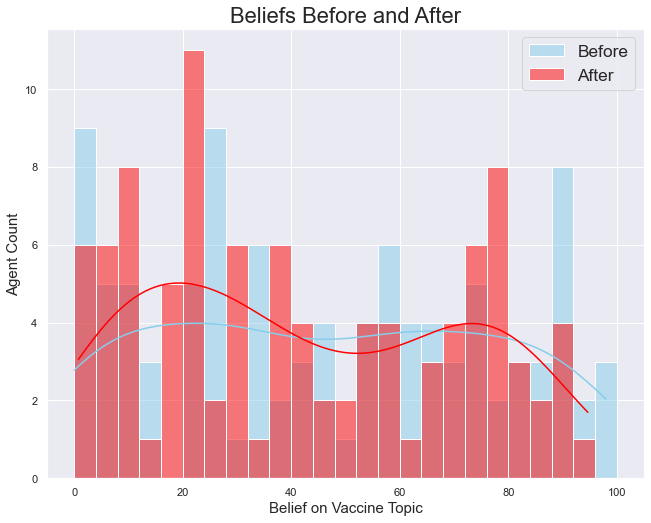

In [42]:
sns.set(style="darkgrid", rc={'figure.figsize':(10.7,8.27)})

sns.histplot(data=before, color="skyblue", label="Before", kde=True, bins=25, binrange=(0,100))
sns.histplot(data=after, color="red", label="After", kde=True, bins=25, binrange=(0,100))

plt.legend(fontsize='x-large')
plt.xlabel("Belief on Vaccine Topic", fontsize=15)
plt.ylabel("Agent Count", fontsize=15)
plt.title("Beliefs Before and After", fontsize=22)
plt.show()